# Title: Attack and Anomaly Detection in IoT Sensors at IoT Sites Using XGBoost

#### Individual's Name : Harjeet Kaur / Simran 

####  Emails : 200560391@student.georgianc.on.ca / 200559701@student.georgianc.on.ca

### INTRODUCTION:
*********************************************************************************************************************
#### AIM : 
This project aims to investigate the effectiveness of the XGBoost algorithm for detecting attacks 
and anomalies in Internet of Things (IoT) sensor data at IoT sites in the paper "Attack-and-Anomaly-Detection-in-IoT-Sensors-in-IoT-Sites-Using-Machine-Learning-Approaches" released in 2019.
*********************************************************************************************************************
#### Github Repo: 
[GITHUB LINK] (https://github.com/200560391/Project_AnomolyDetection/blob/main/Attack%20and%20Anomaly%20Detection%20in%20IoT%20Sensors%20at%20IoT%20Sites%20Using%20XGBoost.ipynb)
*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
This paper performance of machine learning models are used to predict detecting attacks and anomalies in Internet of Things (IoT)sensor data at IoT sites accurately.
#### PROBLEM STATEMENT :
* Try to replicate the results given in paper on text classification datasets with XGBoost models
* choose 1 standard datsets : [Dataset link ](https://github.com/Shauqi/Attack-and-Anomaly-Detection-in-IoT-Sensors-in-IoT-Sites-Using-Machine-Learning-Approaches/blob/master/df_spark.csv) 
* To assess the effectivness of XGBoost, on classified dataset 
* To compare the performance of XGBoost, with the SVM, LR,DT, RF, ANN on the above-mentioned dataset.
*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
*  The security challenges of the Internet of ThingsIoT sensor networks which are being deployed in internet sites. 
*The sensors deployed in these networks are at risk from a number of security threats and attacks such as unauthorised access, data breach or misappropriation due to the increasing adoption of Internet of Things technologies across different sectors.
*********************************************************************************************************************
#### SOLUTION:
* The proposed approach uses a basic concept of classification
* Apply XGboost to enhance the prediction accuracy.


 # Methodology
*********************************************************************************************************************

* Data Loading and Preprocessing
1. Load the IoT sensor dataset (df_spark.csv) and drop unnecessary columns.
2. Separate the target variable (y) and features (X) from the dataset.
3. Binarize the target labels using the label_binarize function.
Dataset Splitting
1. Split the dataset into training and testing sets using a 80-20 ratio.
2. Define the number of classes (n_classes) for multi-class classification.
XGBoost Pipeline Creation
1. Create an XGBoost pipeline using StandardScaler for feature scaling and 
OneVsRestClassifier with XGBoost as the base model.
Model Training and Prediction
1. Fit the XGBoost pipeline to the training data.
2. Predict class probabilities for the test data using the trained model.
ROC Curve Analysis
1. Calculate ROC curves and AUC scores for each class using the roc_curve and auc
functions.
2. Visualize ROC curves for each class using matplotlib.
3. Plot the ROC curve for each class, including area under the curve (AUC) values.
Accuracy Calculation
1. Predict class labels for the test data.
2. Calculate and display the overall accuracy using the accuracy_score function.
Results Visualization
1. Display the ROC curve plot using matplotlib.
2. Show the calculated accuracy score.







# Implementation

# Data Cleaning

In [1]:
import pandas as pd
df_data_1 = pd.read_csv("mainSimulationAccessTraces.csv")

# Missing Value

In [2]:
import numpy as np
df_data_1['accessedNodeType'] = df_data_1['accessedNodeType'].fillna(value='/Malicious')

# Unexpected Values

In [3]:
df_data_1.loc[df_data_1.value=='twenty',"value"] = '20.0'
df_data_1.loc[df_data_1.value=='false',"value"] = '0'
df_data_1.loc[df_data_1.value=='true',"value"] = '1'
df_data_1.loc[df_data_1.value=='none',"value"] = '0'
df_data_1.loc[df_data_1.value=='0',"value"] = '0.0'
df_data_1['value'] = df_data_1['value'].fillna(value='60.0')
df_data_1 = df_data_1.drop(df_data_1.index[df_data_1.value.str.contains("org.*")])
df_data_1.value = df_data_1.value.astype(float)

# Cleaned Data

In [4]:
df_data_1.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,1520031603464,normal


In [7]:
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

# Frequency Distribution Visualization

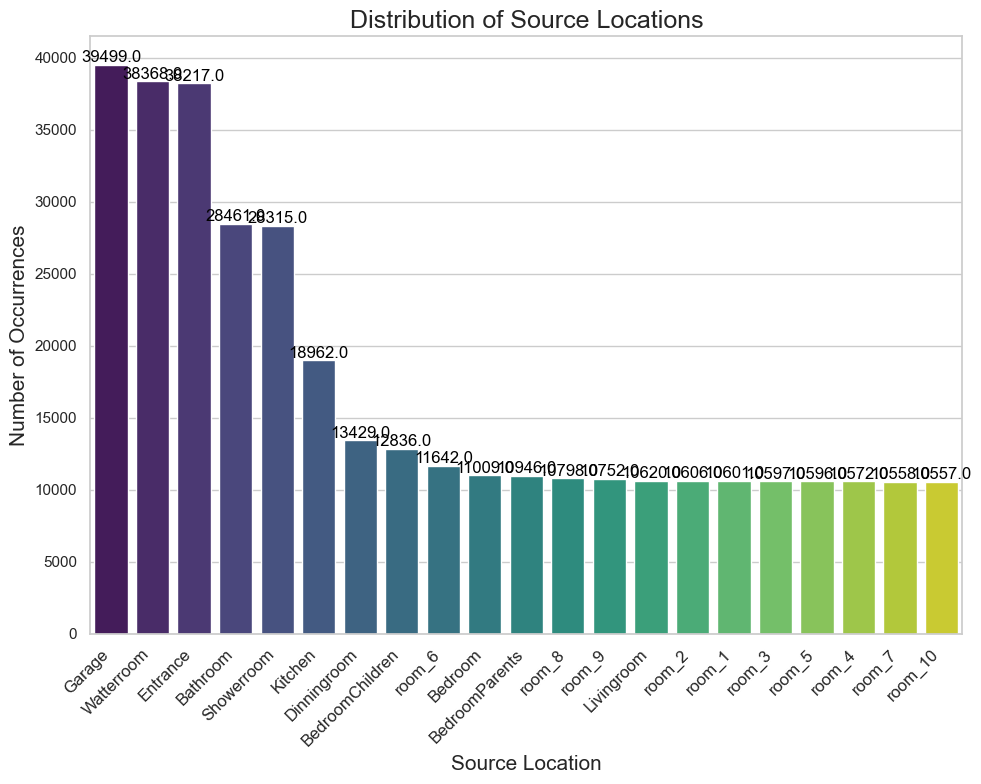

In [8]:
# Set style
sns.set(style="whitegrid")

# Calculate value counts
source_loc_count = df_data_1.sourceLocation.value_counts()

# Create a figure and axis
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=source_loc_count.index, y=source_loc_count.values, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Set labels and title
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Source Location', fontsize=15)
plt.title('Distribution of Source Locations', fontsize=18)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()


In [9]:
for i,j in zip(source_loc_count.index,source_loc_count.values):
    print(i,j)

Garage 39499
Watterroom 38368
Entrance 38217
Bathroom 28461
Showerroom 28315
Kitchen 18962
Dinningroom 13429
BedroomChildren 12836
room_6 11642
Bedroom 11009
BedroomParents 10946
room_8 10798
room_9 10752
Livingroom 10620
room_2 10606
room_1 10601
room_3 10597
room_5 10596
room_4 10572
room_7 10558
room_10 10557


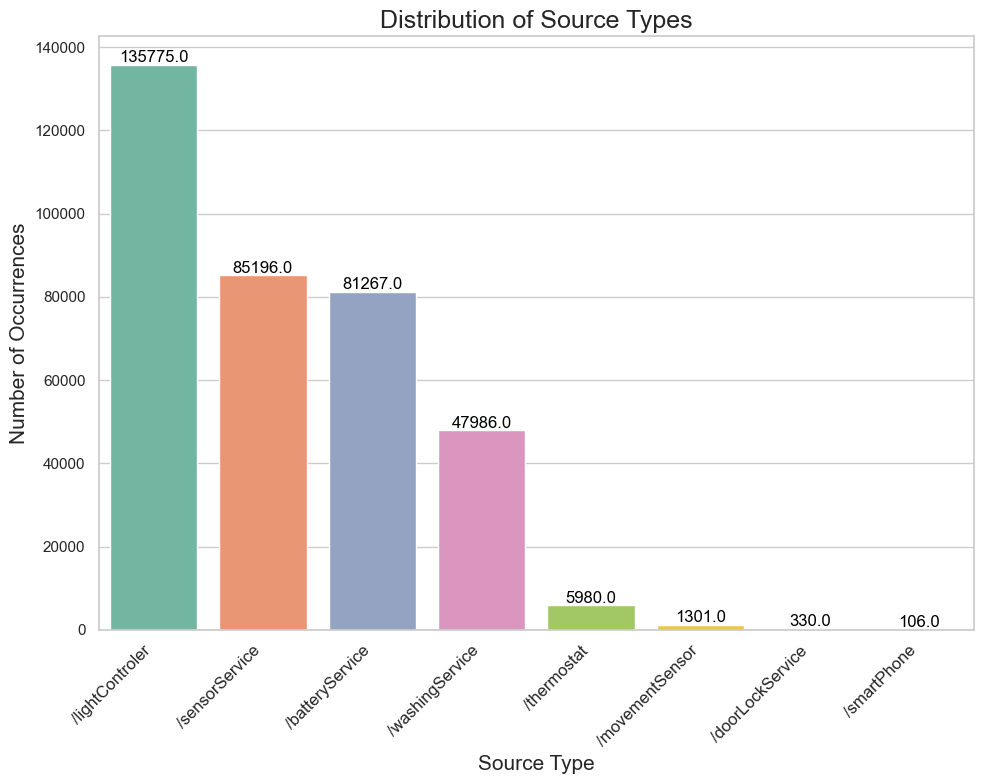

In [10]:
# Set style
sns.set(style="whitegrid")

# Calculate value counts
source_type_count = df_data_1.sourceType.value_counts()

# Create a figure and axis
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=source_type_count.index, y=source_type_count.values, palette="Set2")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Set labels and title
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Source Type', fontsize=15)
plt.title('Distribution of Source Types', fontsize=18)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

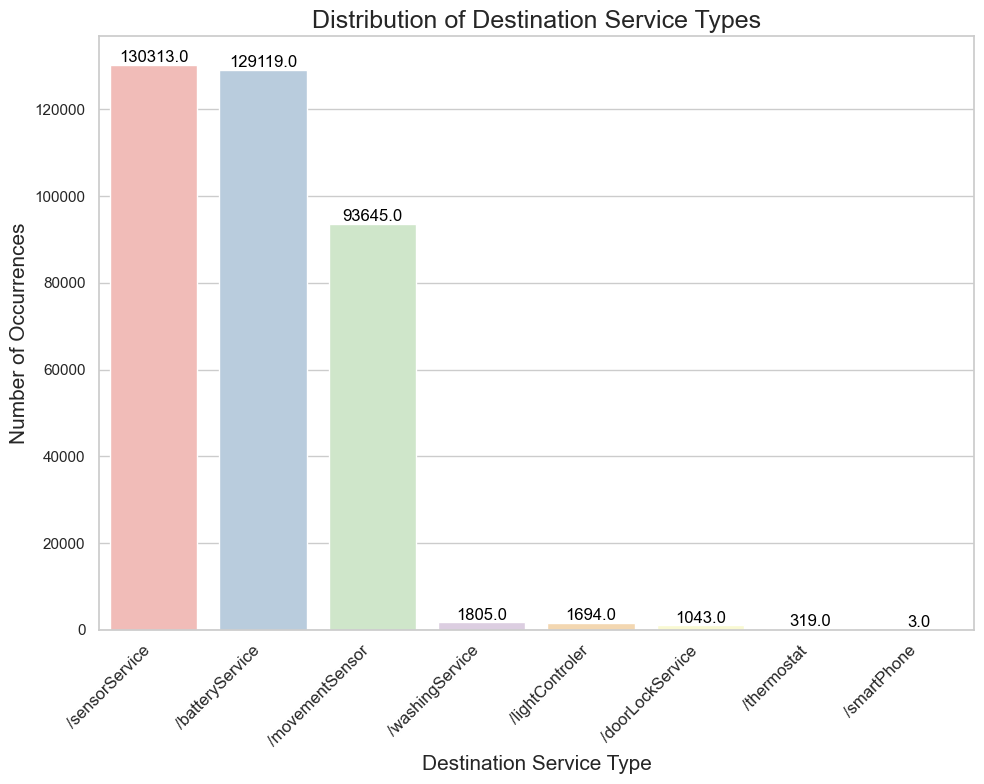

In [11]:
# Set style
sns.set(style="whitegrid")

# Calculate value counts
destination_type_count = df_data_1.destinationServiceType.value_counts()

# Create a figure and axis
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=destination_type_count.index, y=destination_type_count.values, palette="Pastel1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Set labels and title
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Destination Service Type', fontsize=15)
plt.title('Distribution of Destination Service Types', fontsize=18)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

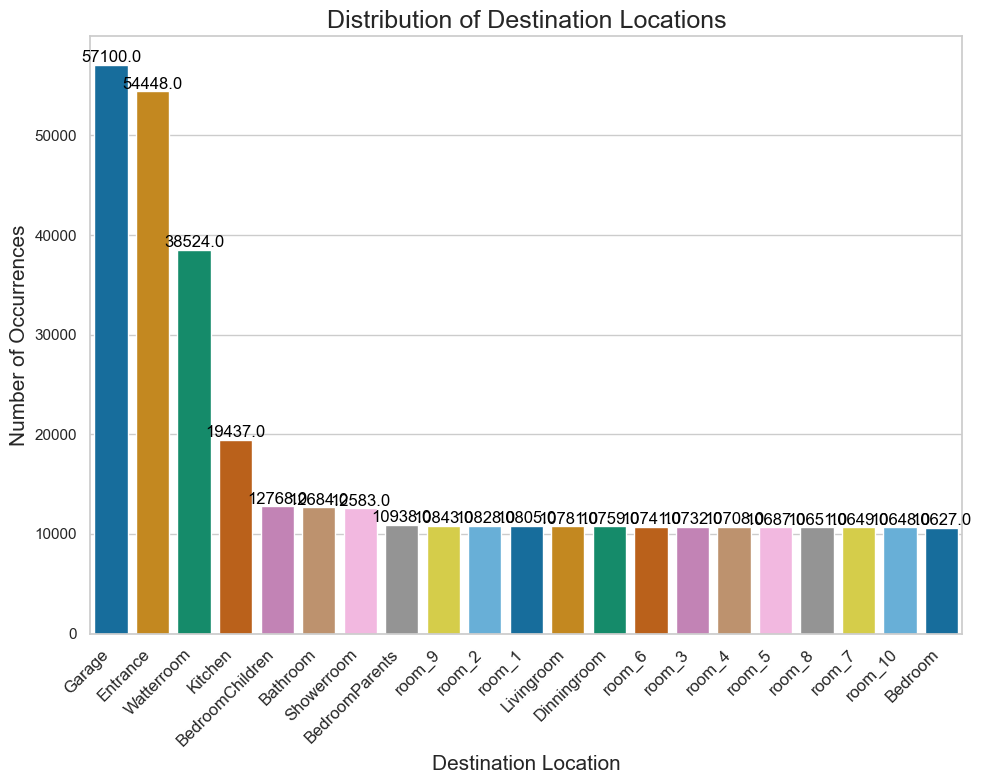

In [12]:
# Set style
sns.set(style="whitegrid")

# Calculate value counts
destination_location_count = df_data_1.destinationLocation.value_counts()

# Create a figure and axis
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=destination_location_count.index, y=destination_location_count.values, palette="colorblind")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Set labels and title
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Destination Location', fontsize=15)
plt.title('Distribution of Destination Locations', fontsize=18)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

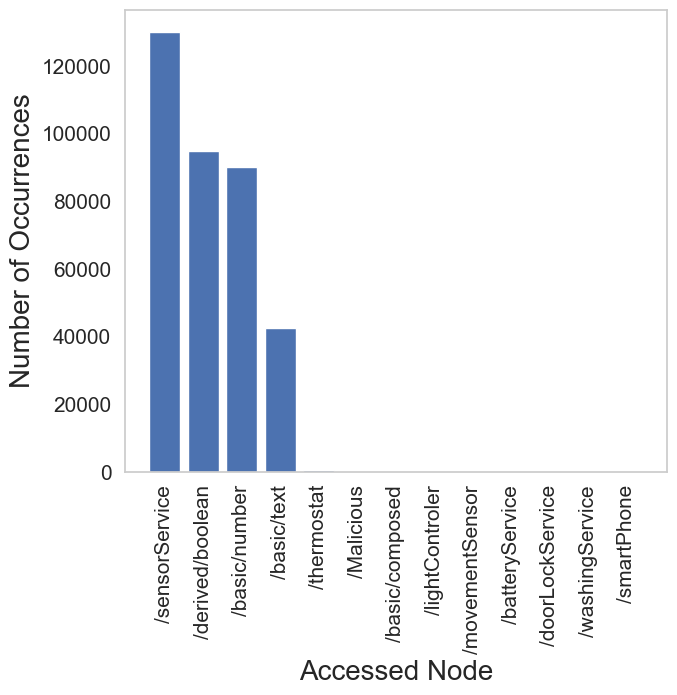

In [13]:
accessed_node_count = df_data_1.accessedNodeType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(accessed_node_count.index, accessed_node_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Accessed Node', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

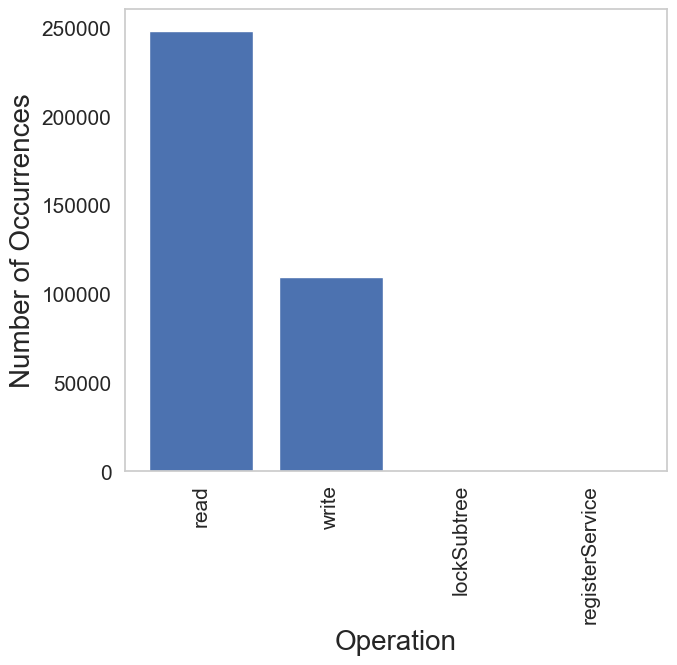

In [14]:
operation_count = df_data_1.operation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(operation_count.index, operation_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Operation', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [15]:
df_1 = df_data_1.drop('timestamp',axis=1)


# Making Features

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder0 = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencodery = LabelEncoder()

In [17]:
X_0 = df_1.iloc[:,0].values
X_1 = df_1.iloc[:,1].values
X_4 = df_1.iloc[:,4].values
X_7 = df_1.iloc[:,7].values
y = df_1.iloc[:,11].values

In [18]:
X_0 = labelencoder0.fit_transform(X_0)
X_0 = X_0.reshape(len(X_0),1)
X_1 = labelencoder1.fit_transform(X_1)
X_1 = X_1.reshape(len(X_1),1)
X_4 = labelencoder4.fit_transform(X_4)
X_4 = X_4.reshape(len(X_4),1)
X_7 = labelencoder7.fit_transform(X_7)
X_7 = X_7.reshape(len(X_7),1)
y = labelencodery.fit_transform(y)

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe_2 = OneHotEncoder()
ohe_3 = OneHotEncoder()
ohe_5 = OneHotEncoder()
ohe_6 = OneHotEncoder()
ohe_8 = OneHotEncoder()
ohe_9 = OneHotEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()
le_8 = LabelEncoder()
le_9 = LabelEncoder()

In [20]:
X_2 = df_1.iloc[:,2].values
X_3 = df_1.iloc[:,3].values
X_5 = df_1.iloc[:,5].values
X_6 = df_1.iloc[:,6].values
X_8 = df_1.iloc[:,8].values
X_9 = df_1.iloc[:,9].values
X_10 = df_1.iloc[:,10].values

In [21]:
X_2 = le_2.fit_transform(X_2)
X_2 = X_2.reshape(len(X_2),1)
#X_2 = ohe_2.fit_transform(X_2)
X_3 = le_3.fit_transform(X_3)
X_3 = X_3.reshape(len(X_3),1)
#X_3 = ohe_3.fit_transform(X_3)
X_5 = le_5.fit_transform(X_5)
X_5 = X_5.reshape(len(X_5),1)
#X_5 = ohe_5.fit_transform(X_5)
X_6 = le_6.fit_transform(X_6)
X_6 = X_6.reshape(len(X_6),1)
#X_6 = ohe_6.fit_transform(X_6)
X_8 = le_8.fit_transform(X_8)
X_8 = X_8.reshape(len(X_8),1)
#X_8 = ohe_8.fit_transform(X_8)
X_9 = le_9.fit_transform(X_9)
X_9 = X_9.reshape(len(X_9),1)
#X_9 = ohe_9.fit_transform(X_9)
X_10 = X_10.reshape(len(X_10),1)

In [22]:
X = np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10),axis=1)

In [23]:
labelencodery.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [24]:
labelencodery.transform(['anomalous(dataProbing)'])

array([1])

In [25]:
y_resized = y.reshape(len(y),1)

In [26]:
df_spark = np.concatenate((y_resized,X),axis=1)

In [27]:
df_spark = pd.DataFrame(df_spark)

In [28]:
df_spark.to_csv('DF_Spark.csv')

In [1]:

import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import matplotlib.pyplot as plt

# Load the dataset
df_spark = pd.read_csv('df_spark.csv')
df_spark = df_spark.drop(columns="Unnamed: 0")

# Separate features (X) and target (y)
y = df_spark.iloc[:, 0].values
X = df_spark.iloc[:, 1:].values

# Binarize the labels
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y.shape[1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create an XGBoost pipeline
pipe_xgb = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsRestClassifier(xgb.XGBClassifier(objective='binary:logistic', random_state=0)))
])

# Fit the XGBoost model
pipe_xgb = pipe_xgb.fit(X_train, y_train)

# Predict probabilities for test data
y_score_xgb = pipe_xgb.predict_proba(X_test)

# Calculate ROC curves and AUC for each class
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test[:, i], y_score_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Calculate accuracy score
y_pred_xgb = pipe_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)





Accuracy: 0.994119208258252


# Graphical Representation

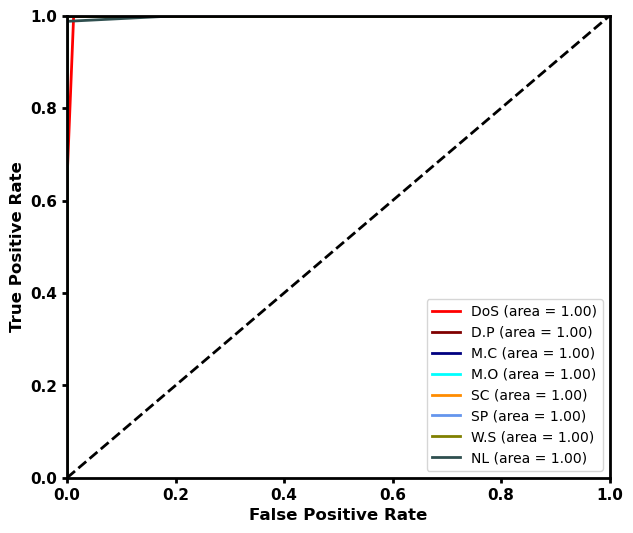

In [2]:



# Plot ROC curves
lw = 2
classes = ["DoS", "D.P", "M.C", "M.O", "SC", "SP", "W.S", "NL"]
plt.figure(figsize=(7, 6))
ax = plt.subplot(111)
colors = cycle(['red', 'maroon', 'navy', 'aqua', 'darkorange', 'cornflowerblue', 'olive', 'darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_xgb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11, weight='bold')
plt.yticks(fontsize=11, weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_XGBoost")

# Display the accuracy score
plt.show()


# Result Analysis on Preprocessed Data (Accuracy, Precision, Recall, F1, Confusion Matrix)

In [4]:
import pandas as pd

df_spark = pd.read_csv('df_spark.csv')

df_spark.head()

df_spark = df_spark.drop(columns="Unnamed: 0")

y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)



# 5-Fold Cross validation Estimation for XGBOOST



In [5]:
# Create a pipeline with StandardScaler and XGBoost classifier
pipe_xgb = Pipeline([('scl', StandardScaler()), ('clf', XGBClassifier())])

# Perform learning curve analysis
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(
    estimator=pipe_xgb,
    X=X_train, y=y_train,
    train_sizes=np.linspace(0.2, 1.0, 5),
    cv=5, n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_std_xgb = np.std(train_scores_xgb, axis=1)
test_mean_xgb = np.mean(test_scores_xgb, axis=1)
test_std_xgb = np.std(test_scores_xgb, axis=1)

# Print the mean training scores
for score in train_mean_xgb:
    print(score)

# Print the mean test scores
for score in test_mean_xgb:
    print(score)



0.9943687794656888
0.9944822769338222
0.9944095221465572
0.9943513183167452
0.9942413382166133
0.9941784934920946
0.9942064308425861
0.9942238918695752
0.9942343685589414
0.9942378607887301


# Evaluation Metrics Calculations for XGBOOST



In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming you have your X and y data prepared
# Replace X and y with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create a pipeline with StandardScaler and XGBoost classifier
pipe_xgb = Pipeline([('scl', StandardScaler()), ('clf', XGBClassifier())])

# Fit the pipeline on the training data
pipe_xgb.fit(X_train, y_train)

# Make predictions using your trained XGBoost model
y_pred = pipe_xgb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision (Micro):", precision_micro)
print("Recall (Micro):", recall_micro)
print("F1-score (Micro):", f1_micro)
print("Confusion Matrix:")
print(conf_matrix)




Accuracy: 0.994119208258252
Precision (Micro): 0.994119208258252
Recall (Micro): 0.994119208258252
F1-score (Micro): 0.994119208258252
Confusion Matrix:
[[  775     0     0     0     0     0     0   403]
 [    0    63     0     0     0     0     0     0]
 [    0     0   169     0     0     0     0     0]
 [    0     0     0   155     0     0     0     0]
 [    0     0     0     0   305     0     0     0]
 [    0     0     0     0     0   120     0     0]
 [    0     0     0     0     0     0    28     0]
 [   18     0     0     0     0     0     0 69553]]



# Conclusion and Future Direction :

#### Project Summary:
This project demonstrates the application of the XGBoost algorithm for detecting attacks and 
anomalies in IoT sensor data collected at various IoT sites. The methodology involves data 
preprocessing, model training, and evaluation using ROC curve analysis and accuracy 
calculation.

#### Insights and Implications:
The ROC curve analysis provides insights into the model's performance for different classes, 
helping to identify potential strengths and weaknesses. The accuracy score offers an overall 
measure of the model's effectiveness in detecting IoT sensor anomalies.


#### Future Directions
Future work could involve hyperparameter tuning to optimize model performance further and 
exploring additional feature engineering techniques. Additionally, the project could be extended 
to consider other machine learning algorithms and ensemble methods for comparison.



# References :

[1]: Pahl, M. O., & Aubet, F. X. (2018, November). All eyes on you: Distributed Multi-Dimensional IoT microservice anomaly detection. In 2018 14th International Conference on Network and Service Management (CNSM) (pp. 72-80). IEEE.

[2]: Hasan, M., Islam, M. M., Zarif, M. I. I., & Hashem, M. M. A. (2019). Attack and anomaly detection in IoT sensors in IoT sites using machine learning approaches. Internet of Things, 7, 100059.

[3]: D’Angelo, G., Laracca, M., & Rampone, S. (2016). Automated eddy current non-destructive testing through low definition lissajous figures. 2016 IEEE Metrology for Aerospace (MetroAeroSpace), 280-285.

[4]: Liu, X., Liu, Y., Liu, A., & Yang, L. T. (2018). Defending ON–OFF attacks using light probing messages in smart sensors for industrial communication systems. IEEE Transactions on Industrial Informatics, 14(9), 3801-3811.

[5]: Pajouh, H. H., Javidan, R., Khayami, R., Dehghantanha, A., & Choo, K. K. R. (2016). A two-layer dimension reduction and two-tier classification model for anomaly-based intrusion detection in IoT backbone networks. IEEE Transactions on Emerging Topics in Computing, 7(2), 314-323

